In [2]:
!pip install opencv-python

In [3]:
import os
import numpy as np
import pywt
import cv2
from skimage.feature import greycomatrix, greycoprops
import csv
import pandas as pd

In [32]:
import cv2

In [124]:
data_dir=os.path.expanduser('E:\\Brinjal_Chilly_Ladies')
files = []
labels=[]
# r=root, d=directories, f = files
for r, d, f in os.walk(data_dir):
    for file in f:
        if '.png' in file:
            label=r.split('\\')[-1]
            labels.append(label)
            files.append(os.path.join(r,file))
            
for f in files:
    print(f)

E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (1).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (10).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (100).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (101).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (102).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (103).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (104).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (105).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (106).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (107).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (108).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (109).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (11).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (110).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (111).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (112).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (113).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (114).png
E:\Brinjal_Chilly_Ladies\Brinjal\Brinjal (115).png
E:\Brinjal_Chilly_Ladies\Brinjal\Br

In [164]:
with open('new_coif3_features.csv', "a+", newline="") as wr:
    writer = csv.writer(wr)
    i=0
    for f in files:
        label=f.split('\\')[-1]
        img=cv2.imread(f)
        coeffs2 = pywt.dwt2(img, 'coif3')
        LL, (LH, HL, HH) = coeffs2
        g=[]
        con=[]
        enr=[]
        dis=[]
        hom=[]
        g.append(greycomatrix(np.uint8(LL[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LL[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LL[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(LH[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HL[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,0]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,1]), [1], [0], levels=256,normed=True,symmetric=True))
        g.append(greycomatrix(np.uint8(HH[:,:,2]), [1], [0], levels=256,normed=True,symmetric=True))
        for t in range(0,len(g)):
            con.append(greycoprops(np.array(g[t]), 'contrast'))
            enr.append(greycoprops(np.array(g[t]), 'energy'))
            dis.append(greycoprops(np.array(g[t]), 'dissimilarity'))
            hom.append(greycoprops(np.array(g[t]), 'homogeneity'))
        con_features=np.reshape(np.array(con).ravel(),(1,len(np.array(con).ravel())))
        enr_features=np.reshape(np.array(enr).ravel(),(1,len(np.array(enr).ravel())))
        dis_features=np.reshape(np.array(dis).ravel(),(1,len(np.array(dis).ravel())))
        hom_features=np.reshape(np.array(hom).ravel(),(1,len(np.array(hom).ravel())))
        features=np.concatenate((con_features,enr_features,dis_features,hom_features),axis=1);
        ff=features[0].tolist()     
        writer.writerow(ff+[labels[i]])
        i+=1
    wr.close()

C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\User\anaconda3\lib\site

In [165]:
features_db=pd.read_csv('new_coif3_features.csv',header=None)
features_db.tail()

0           1           2             3             4   \
445  714.778398  737.380584  712.623528  20621.157468  20286.251886   
446  350.487974  348.639928  348.240212   8684.357627   8110.809546   
447  347.440491  327.072925  299.290881  11852.343060  11639.455121   
448  408.733084  406.354770  411.062712   8944.658445   8370.468982   
449  434.519682  434.269109  435.293867   7072.841223   6326.312184   

               5           6          7          8           9   ...  \
445  20707.800169  796.371192   1.113843   2.133212  304.508794  ...   
446   8751.391838  389.212596  10.638993  11.145771   97.410025  ...   
447  11905.676689  378.321563   7.745304   0.979300  143.044815  ...   
448   9085.962913  466.502419   0.588611   0.935959  157.091727  ...   
449   7173.783598  468.783793  37.075706  17.122183  129.927761  ...   

           39        40        41        42        43        44        45  \
445  0.571330  0.579906  0.569100  0.719828  0.833275  0.815819  0.992552   
446  0.819047  0.831801  0.817682  0.845078  0.908823  0.905904  0.997548   
447  0.754795  0.760318  0.753618  0.846446  0.908012  0.901811  0.996283   
448  0.812967  0.826209  0.810590  0.829956  0.896725  0.895739  0.995830   
449  0.848654  0.865175  0.847270  0.834349  0.899443  0.896064  0.996861   

           46        47             48  
445  0.999879  0.999277  Ladies_finger  
446  0.999994  0.999963  Ladies_finger  
447  0.999951  0.999737  Ladies_finger  
448  0.999944  0.999688  Ladies_finger  
449  0.999976  0.999924  Ladies_finger  

[5 rows x 49 columns]

In [166]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(features_db[48]))}   # 12-->48
class_mapping

{'Brinjal': 0, 'Chilli': 1, 'Ladies_finger': 2}

In [167]:
features_db[48] = features_db[48].map(class_mapping)  # 12-->48

In [168]:
features_db.tail()


0           1           2             3             4   \
445  714.778398  737.380584  712.623528  20621.157468  20286.251886   
446  350.487974  348.639928  348.240212   8684.357627   8110.809546   
447  347.440491  327.072925  299.290881  11852.343060  11639.455121   
448  408.733084  406.354770  411.062712   8944.658445   8370.468982   
449  434.519682  434.269109  435.293867   7072.841223   6326.312184   

               5           6          7          8           9   ...  \
445  20707.800169  796.371192   1.113843   2.133212  304.508794  ...   
446   8751.391838  389.212596  10.638993  11.145771   97.410025  ...   
447  11905.676689  378.321563   7.745304   0.979300  143.044815  ...   
448   9085.962913  466.502419   0.588611   0.935959  157.091727  ...   
449   7173.783598  468.783793  37.075706  17.122183  129.927761  ...   

           39        40        41        42        43        44        45  \
445  0.571330  0.579906  0.569100  0.719828  0.833275  0.815819  0.992552   
446  0.819047  0.831801  0.817682  0.845078  0.908823  0.905904  0.997548   
447  0.754795  0.760318  0.753618  0.846446  0.908012  0.901811  0.996283   
448  0.812967  0.826209  0.810590  0.829956  0.896725  0.895739  0.995830   
449  0.848654  0.865175  0.847270  0.834349  0.899443  0.896064  0.996861   

           46        47  48  
445  0.999879  0.999277   2  
446  0.999994  0.999963   2  
447  0.999951  0.999737   2  
448  0.999944  0.999688   2  
449  0.999976  0.999924   2  

[5 rows x 49 columns]

In [169]:
X,Y = features_db.loc[:,0:48],features_db.loc[:,48]    #12-->48

In [170]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
print(Version(sklearn_version))    
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)

C:\Users\User\AppData\Local\Temp\ipykernel_3412\2163967750.py:3: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
C:\Users\User\AppData\Local\Temp\ipykernel_3412\2163967750.py:7: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.0.2


In [171]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [172]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_std = pca.fit_transform(X_train_std)  
X_test_std = pca.transform(X_test_std) 
X_train_std.shape

(315, 10)

In [173]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [174]:
from sklearn import svm
clf=svm.SVC()
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.96


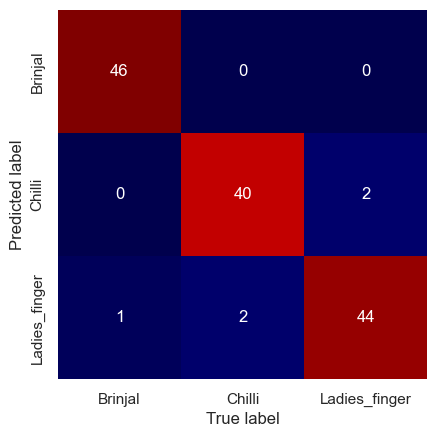

In [175]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, cmap="seismic", square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=class_mapping, yticklabels=class_mapping)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_mapping))

               precision    recall  f1-score   support

      Brinjal       1.00      0.98      0.99        47
       Chilli       0.95      0.95      0.95        42
Ladies_finger       0.94      0.96      0.95        46

     accuracy                           0.96       135
    macro avg       0.96      0.96      0.96       135
 weighted avg       0.96      0.96      0.96       135

